In [240]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [241]:
stud_alc = pd.read_csv('student_alc.csv')
stud_alc.head()
#stud_alc.internet

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [242]:
stud_port = pd.read_csv('student_port.csv')
stud_port.head()
#stud_port.internet

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [243]:
#deleted rows that are not needed

del stud_alc['reason']
del stud_alc['guardian']
del stud_alc['schoolsup']
del stud_alc['famsup']
del stud_alc['nursery']
del stud_alc['famrel']

del stud_port['reason']
del stud_port['guardian']
del stud_port['schoolsup']
del stud_port['famsup']
del stud_port['nursery']
del stud_port['famrel']

#changed values to 0s and 1s but did it in a diff table
data = stud_alc.copy(deep=True)
data['sex'] = [0 if x == 'F' else 1 for x in stud_alc['sex']]
data['Pstatus'] = [0 if x == 'A' else 1 for x in stud_alc['Pstatus']]
data['famsize'] = [1 if x == 'GT3' else 2 for x in stud_alc['famsize']]
data['paid'] = [0 if x == 'no' else 1 for x in stud_alc['paid']]
data['activities'] = [0 if x == 'no' else 1 for x in stud_alc['activities']]
data['higher'] = [0 if x == 'no' else 1 for x in stud_alc['higher']]
data['romantic'] = [0 if x == 'no' else 1 for x in stud_alc['romantic']]
data['internet'] = [0 if x == 'no' else 1 for x in stud_alc['internet']]

#changed few names but not needed
data.head()
data = data.rename(columns={'school': 'School', 'sex': 'Sex', \
                            'age.': 'Age', 'address': 'Address','famsize':'Fam_size','Pstatus':'P_status', \
                            'Medu': 'M_edu', 'Fedu': 'F_edu','Mjob':'M_job','Fjob':'F_job'})

data.head()

,School,Sex,age,Address,Fam_size,P_status,M_edu,F_edu,M_job,F_job,...,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,0,18,U,1,0,4,4,at_home,teacher,...,0,3,4,1,1,3,6,5,6,6
1,GP,0,17,U,1,1,1,1,at_home,other,...,0,3,3,1,1,3,4,5,5,6
2,GP,0,15,U,2,1,1,1,at_home,other,...,0,3,2,2,3,3,10,7,8,10
3,GP,0,15,U,1,1,4,2,health,services,...,1,2,2,1,1,5,2,15,14,15
4,GP,0,16,U,1,1,3,3,other,other,...,0,3,2,1,2,5,4,6,10,10


In [244]:

def getScatterPlotByColumn(colname):
    fig, ax = plt.subplots()
    ax.scatter(stud_alc[colname], stud_alc['Dalc'])
    # generate scatterplot between population (x) and dropouts (y)
    m, y = np.polyfit(stud_alc[colname], stud_alc['Dalc'], 1)
    plt.plot(stud_alc[colname], m * stud_alc[colname] + y, '-',color="magenta")
    plt.title('Dalc vs {} '.format(colname))
    plt.xlabel(colname)
    plt.ylabel('Dalc')
    plt.show()
    slope, intercept, r_value, p_value, std_err = stats.linregress(stud_alc[colname], stud_alc['Dalc'])
    print('r^2 value for correlation between {} and Dalc: {}'.format(colname, r_value**2))

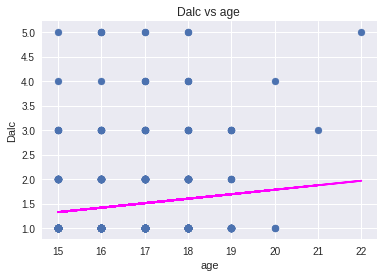

r^2 value for correlation between age and Dalc: 0.017193661962333583


In [245]:
getScatterPlotByColumn('age')

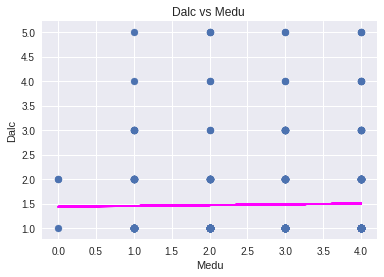

r^2 value for correlation between Medu and Dalc: 0.0003933914659114907


In [210]:
getScatterPlotByColumn('Medu')

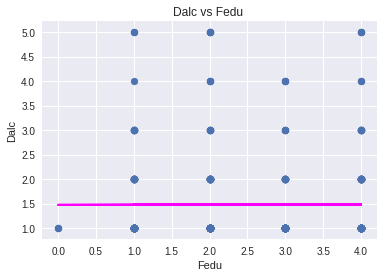

r^2 value for correlation between Fedu and Dalc: 5.69504532006385e-06


In [211]:
getScatterPlotByColumn('Fedu')

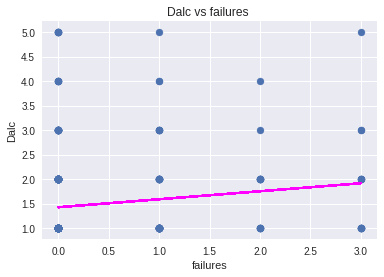

r^2 value for correlation between failures and Dalc: 0.01850876749343979


In [212]:
getScatterPlotByColumn('failures')

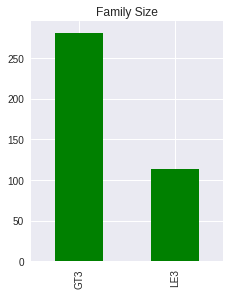

In [228]:
Fam_size = plt.figure(figsize=(20,15))
fam = Fam_size.add_subplot(3, 5,1)

fam.set_title('Family Size')

# Retrieve values from dataframe in 'workclass' and add them to the figure
stud_alc['famsize'].value_counts().plot(color = "green", kind="bar", axes=fam)
plt.show()

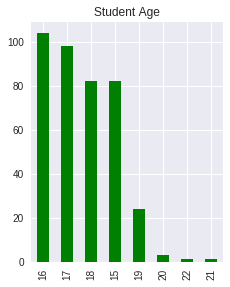

In [232]:
Fam_size = plt.figure(figsize=(20,15))
fam = Fam_size.add_subplot(3, 5,1)

fam.set_title('Student Age')

# Retrieve values from dataframe in 'workclass' and add them to the figure
stud_alc['age'].value_counts().plot(color = "green", kind="bar", axes=fam)
plt.show()

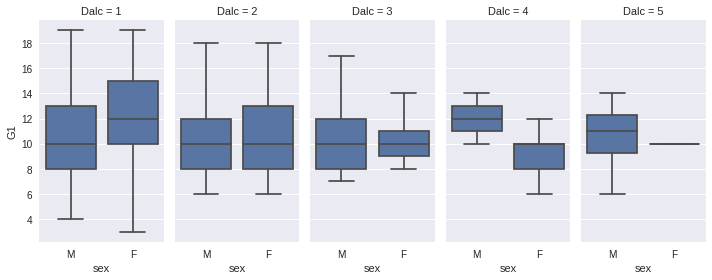

In [214]:
#box whsiker for sex vs dalc and grades for math class
g = sns.FacetGrid(stud_alc, col='Dalc', size=4, aspect=.5)
g = g.map(sns.boxplot, 'sex', 'G1')
sns.plt.show()

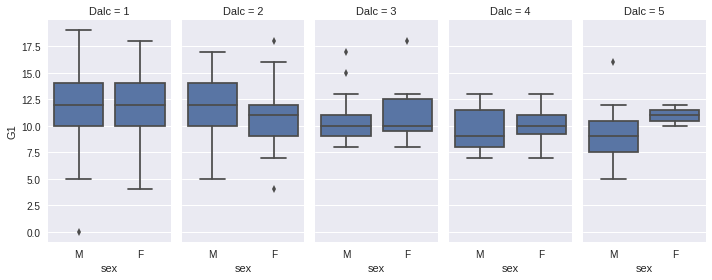

In [246]:
#box whsiker for sex vs dalc and grades for portugese class
g = sns.FacetGrid(stud_port, col='Dalc', size=4, aspect=.5)
g = g.map(sns.boxplot, 'sex', 'G1')
sns.plt.show()

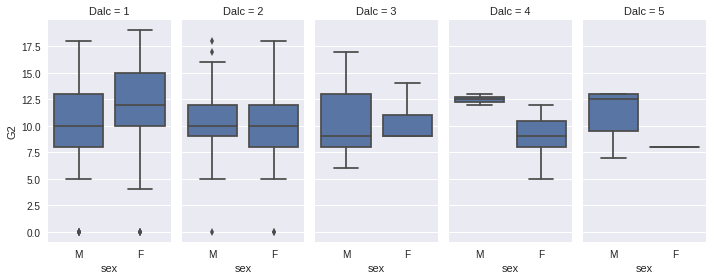

In [215]:
#box whsiker for sex vs dalc and grades
g = sns.FacetGrid(stud_alc, col='Dalc', size=4, aspect=.5)
g = g.map(sns.boxplot, 'sex', 'G2')
sns.plt.show()

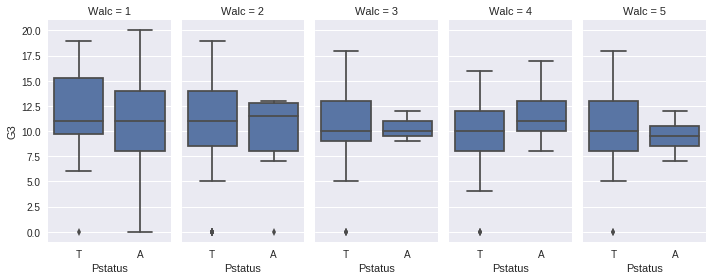

In [216]:
#box whsiker for sex vs walc and grades
g = sns.FacetGrid(stud_alc, col='Walc', size=4, aspect=.5)
g = g.map(sns.boxplot, 'Pstatus', 'G3')
sns.plt.show()

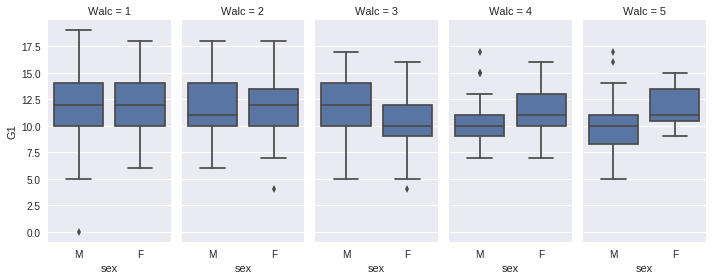

In [249]:
#box whsiker for sex vs walc and grades for portugese class
g = sns.FacetGrid(stud_port, col='Walc', size=4, aspect=.5)
g = g.map(sns.boxplot, 'sex', 'G1')
sns.plt.show()

In [217]:
def getScatterPlotByColumn2(colname):
    fig, ax = plt.subplots()
    ax.scatter(data[colname], data['G3'])
    # generate scatterplot between population (x) and dropouts (y)
    m, y = np.polyfit(data[colname], data['G3'], 1)
    plt.plot(data[colname], m * data[colname] + y, '-',color="magenta")
    plt.title('G3 vs {} '.format(colname))
    plt.xlabel(colname)
    plt.ylabel('G3')
    plt.show()
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[colname], data['G3'])
    print('r^2 value for correlation between {} and G3: {}'.format(colname, r_value**2))

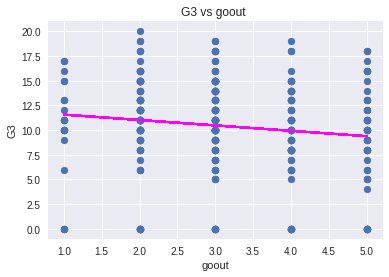

r^2 value for correlation between goout and G3: 0.01763357543518539


In [230]:
getScatterPlotByColumn2('goout')

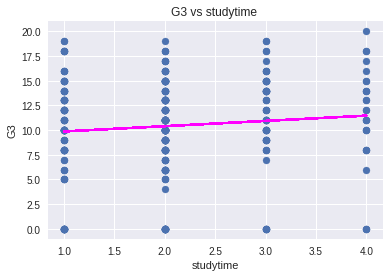

r^2 value for correlation between studytime and G3: 0.009568691683847635


In [218]:
#study time vs grades
getScatterPlotByColumn2('studytime')

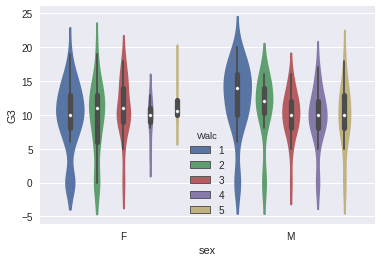

In [219]:
sns.violinplot(x= 'sex', y='G3', hue='Walc', data=stud_alc, scale='count',size = 20)
sns.plt.show()

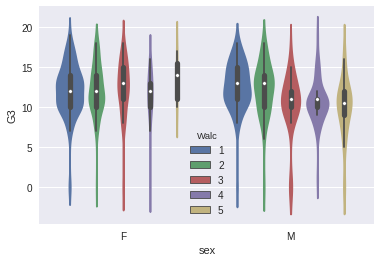

In [248]:
#box whsiker for sex vs walc and grades for portugese class
sns.violinplot(x= 'sex', y='G3', hue='Walc', data=stud_port, scale='count',size = 20)
sns.plt.show()

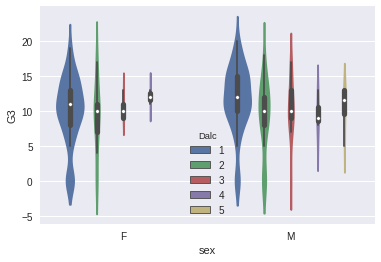

In [220]:
sns.violinplot(x= 'sex', y='G3', hue='Dalc', data=stud_alc, scale='count',size = 20)
sns.plt.show()

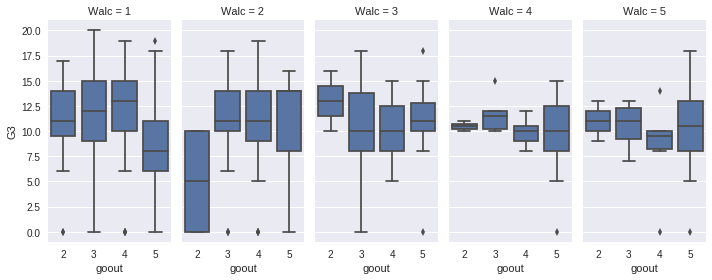

In [227]:
g = sns.FacetGrid(stud_alc, col='Walc', size=4, aspect=.5)
g = g.map(sns.boxplot, 'goout', 'G3')
sns.plt.show()

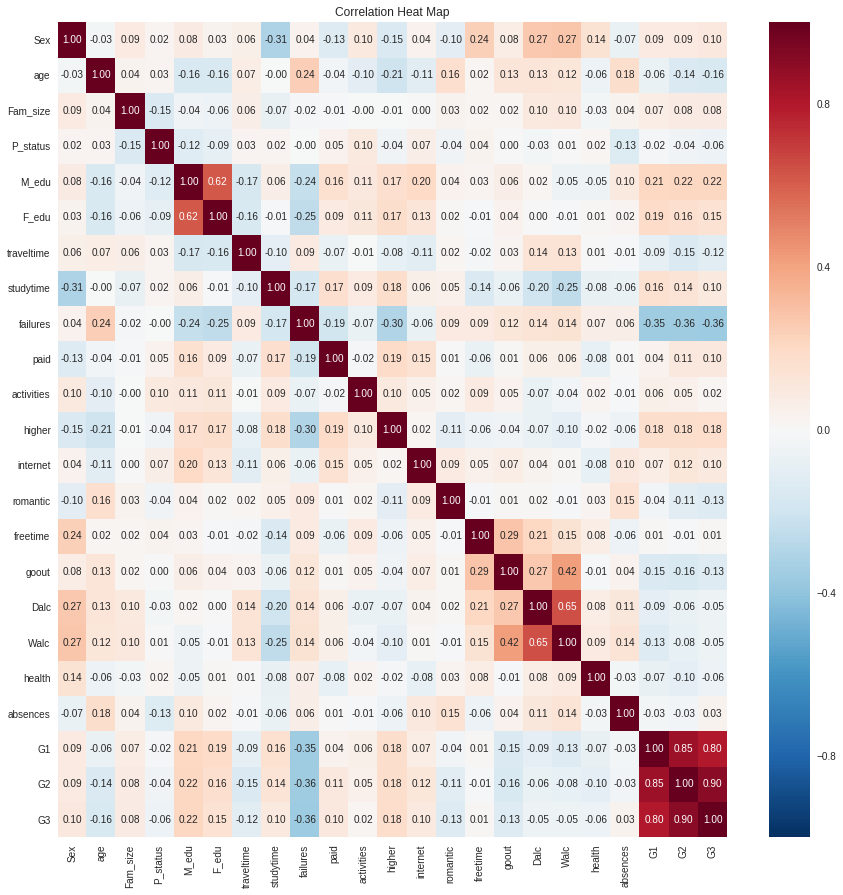

In [252]:
plt.figure(figsize=(15,15))
plt.title('Correlation Heat Map')
sns.heatmap(data.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()
##I Found this is one of the kernels 